# Workshop Titanic tragedy

Let's study passengers demographic to know who acceded on the life boat.

![Titanic image](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/450px-RMS_Titanic_3.jpg)

Data set: http://mob.u-strasbg.fr/lab/titanic.csv

Goals:
- import data set 
- select the userful columns
- find the younger and older passenger
- find medium age
- visualize age demographic
- find the survival probability depending on Class, genre and age




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dfo = pd.read_csv("http://mob.u-strasbg.fr/lab/titanic.csv")

In [ ]:
dfo.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [ ]:
df= dfo.drop(columns=["SibSp","Parch","Ticket","Fare","Cabin","Embarked"])

In [ ]:
df.set_index("PassengerId",inplace=True)

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0
...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0


In [ ]:
df

,Survived,Pclass,Name,Sex,Age
PassengerId,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
5,0,3,"Allen, Mr. William Henry",male,35.0
...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN


In [ ]:
df["Age"]

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889     NaN
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
df.Age

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889     NaN
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

Let's find the younger passenger

In [ ]:
df.Age.min()

0.42

In [ ]:
df.Age.max()

80.0

In [ ]:
df.Age.mean()

29.69911764705882

In [ ]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
df[df.Age == df.Age.max()]

,Survived,Pclass,Name,Sex,Age
PassengerId,,,,,
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0


In [ ]:
df.Age

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889     NaN
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
ages = df.Age.value_counts()

In [ ]:
ages = ages.sort_index()

In [ ]:
ages

0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: Age, Length: 88, dtype: int64

Text(0, 0.5, 'Nb of people')

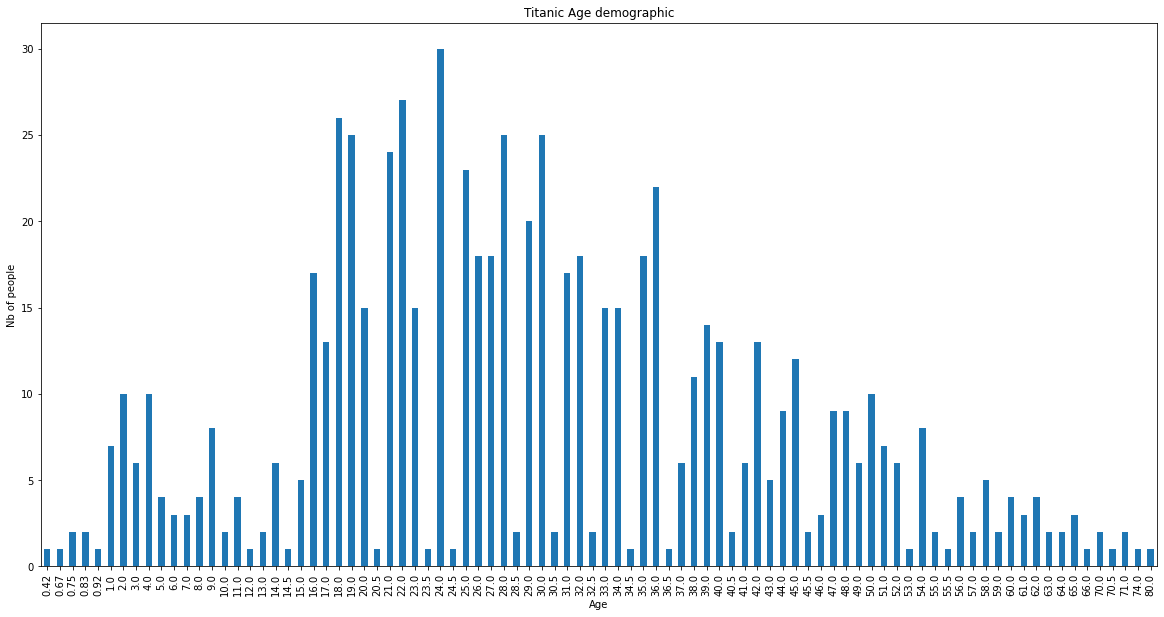

In [ ]:
graph = ages.plot.bar(figsize=(20,10))
graph.set_title("Titanic Age demographic")
graph.set_xlabel("Age")
graph.set_ylabel("Nb of people")


In [ ]:
df.head(1)

,Survived,Pclass,Name,Sex,Age
PassengerId,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0


In [ ]:
classes = df.Pclass.value_counts()

In [ ]:
classes

3    491
1    216
2    184
Name: Pclass, dtype: int64

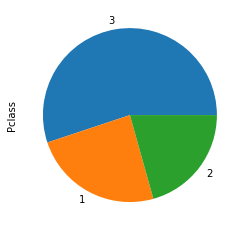

In [ ]:
classes.plot.pie()

In [ ]:
df.head(1)

,Survived,Pclass,Name,Sex,Age
PassengerId,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0


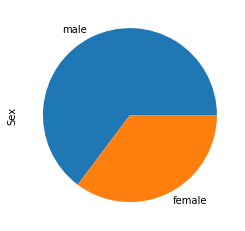

In [ ]:
genre  = df.Sex.value_counts()
genre.plot.pie()

In [ ]:
df.groupby(["Pclass","Sex"]).mean()

Survived        Age
Pclass Sex                        
1      female  0.968085  34.611765
       male    0.368852  41.281386
2      female  0.921053  28.722973
       male    0.157407  30.740707
3      female  0.500000  21.750000
       male    0.135447  26.507589

In [ ]:
df[df.Age < 18].groupby(["Pclass","Sex"]).mean()

Survived        Age
Pclass Sex                        
1      female  0.875000  14.125000
       male    1.000000   8.230000
2      female  1.000000   8.333333
       male    0.818182   4.757273
3      female  0.542857   8.428571
       male    0.232558   9.963256